<a href="https://colab.research.google.com/github/leootorress/investments/blob/main/Galpones_2024_vs_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch


ggal_usa = yf.download('GGAL', auto_adjust=True)
ggal_arg = yf.download('GGAL.BA', auto_adjust=True)
ggal_arg.index = ggal_arg.index.date
ggal_usa.index = ggal_usa.index.date

CCL = (ggal_arg/ggal_usa).mul(10).dropna().Close

tickers_yahoo = ['^MERV','AGRO.BA', 'AUSO.BA', 'BHIP.BA', 'BOLT.BA', 'BPAT.BA',  'CADO.BA', 'CAPX.BA', 'CARC.BA', 'CECO2.BA', 'CELU.BA', 'CEPU.BA',
                 'CGPA2.BA', 'CTIO.BA', 'DGCU2.BA', 'DOME.BA', 'DYCA.BA', 'FERR.BA', 'FIPL.BA', 'GARO.BA', 'GBAN.BA', 'MTR.BA',
                 'GCLA.BA', 'GRIM.BA', 'HAVA.BA', 'INTR.BA', 'INVJ.BA', 'IRSA.BA', 'LEDE.BA', 'LONG.BA', 'METR.BA', 'MOLA.BA', 'MOLI.BA',
                 'MORI.BA', 'OEST.BA', 'PATA.BA', 'RICH.BA', 'RIGO.BA',  'ROSE.BA', 'SAMI.BA', 'SEMI.BA', 'ALUA.BA', 'BBAR.BA',
                 'BMA.BA', 'BYMA.BA', 'CEPU.BA', 'COME.BA', 'CRES.BA', 'CVH.BA', 'EDN.BA', 'GGAL.BA', 'MIRG.BA', 'PAMP.BA', 'SUPV.BA',
                 'TECO2.BA', 'TGNO4.BA', 'TGSU2.BA', 'TRAN.BA', 'YPFD.BA', 'VALO.BA', 'LOMA.BA']

sector_dictionary = {
    "AGRO.BA": "Industria",
    "AUSO.BA": "Servicios Regulados",
    "BHIP.BA": "Financiero",
    "BOLT.BA": "Tech",
    "BPAT.BA": "Financiero",
    "CADO.BA": "Agro y Alimentos",
    "CAPX.BA": "Energía",
    "CARC.BA": "Industria",
    "CECO2.BA": "Energía",
    "CELU.BA": "Industria",
    "CEPU.BA": "Energía",
    "CGPA2.BA": "Energía",
    "CTIO.BA": "REIT y Construccion",
    "DGCU2.BA": "Energía",
    "DOME.BA": "Industria",
    "DYCA.BA": "REIT y Construccion",
    "FERR.BA": "Industria",
    "FIPL.BA": "Industria",
    "GAMI.BA": "Tech",
    "GARO.BA": "Diversificado",
    "GBAN.BA": "Servicios Regulados",
    "GCLA.BA": "Consumo / Retail",
    "GRIM.BA": "Consumo / Retail",
    "HAVA.BA": "Consumo / Retail",
    "INTR.BA": "Agro y Alimentos",
    "INVJ.BA": "Agro y Alimentos",
    "IRSA.BA": "REIT y Construccion",
    "LOMA.BA": "REIT y Construccion",
    "LEDE.BA": "Industria",
    "LONG.BA": "Industria",
    "METR.BA": "Servicios Regulados",
    "MOLA.BA": "Agro y Alimentos",
    "MOLI.BA": "Agro y Alimentos",
    "MORI.BA": "Agro y Alimentos",
    "MTR.BA": "Tech",
    "OEST.BA": "Servicios Regulados",
    "PATA.BA": "Consumo / Retail",
    "RICH.BA": "Industria",
    "RIGO.BA": "Industria",
    "ROSE.BA": "Agro y Alimentos",
    "SAMI.BA": "Agro y Alimentos",
    "SEMI.BA": "Agro y Alimentos",
    "ALUA.BA": "Industria",
    "BBAR.BA": "Financiero",
    "BMA.BA": "Financiero",
    "BYMA.BA": "Financiero",
    "VALO.BA": "Financiero",
    "CEPU.BA": "Energía",
    "COME.BA": "Diversificado",
    "CRES.BA": "Agro y Alimentos",
    "CVH.BA": "Servicios Regulados",
    "EDN.BA": "Servicios Regulados",
    "GGAL.BA": "Financiero",
    "MIRG.BA": "Diversificado",
    "PAMP.BA": "Energía",
    "SUPV.BA": "Financiero",
    "TECO2.BA": "Servicios Regulados",
    "TGNO4.BA": "Energía",
    "TGSU2.BA": "Energía",
    "TRAN.BA": "Energía",
    "TXAR.BA": "Industria",
    "YPFD.BA": "Energía",
    "^MERV":"Indice"
}


data = yf.download(tickers_yahoo, auto_adjust=True, start='2018-01-18')['Close']
data.index = data.index.date

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  60 of 60 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RICH.BA']: YFInvalidPeriodError("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


In [ ]:
def addSplits(ticker, date, rate, df):
  serie = df[ticker].copy()
  adjustments = [1 if x < pd.Timestamp(date).date() else rate for x in serie.index]
  df[ticker] = serie * np.array(adjustments)
  return df

# AGREGO a mano splits faltantes en yfinance
data = addSplits(ticker='AGRO.BA', date='2023-11-03', rate=12, df=data)


data.index = pd.to_datetime(data.index)
data = data.sort_index()
data = data.divide(CCL, axis=0)
data = data.loc[data.index>'2018-01-18'].interpolate()


from_ene_2018 = ((data / data.iloc[0])-1).iloc[-1]
from_paso = (data.loc['2019-08-09':]/data.loc['2019-08-09']-1).iloc[-1]

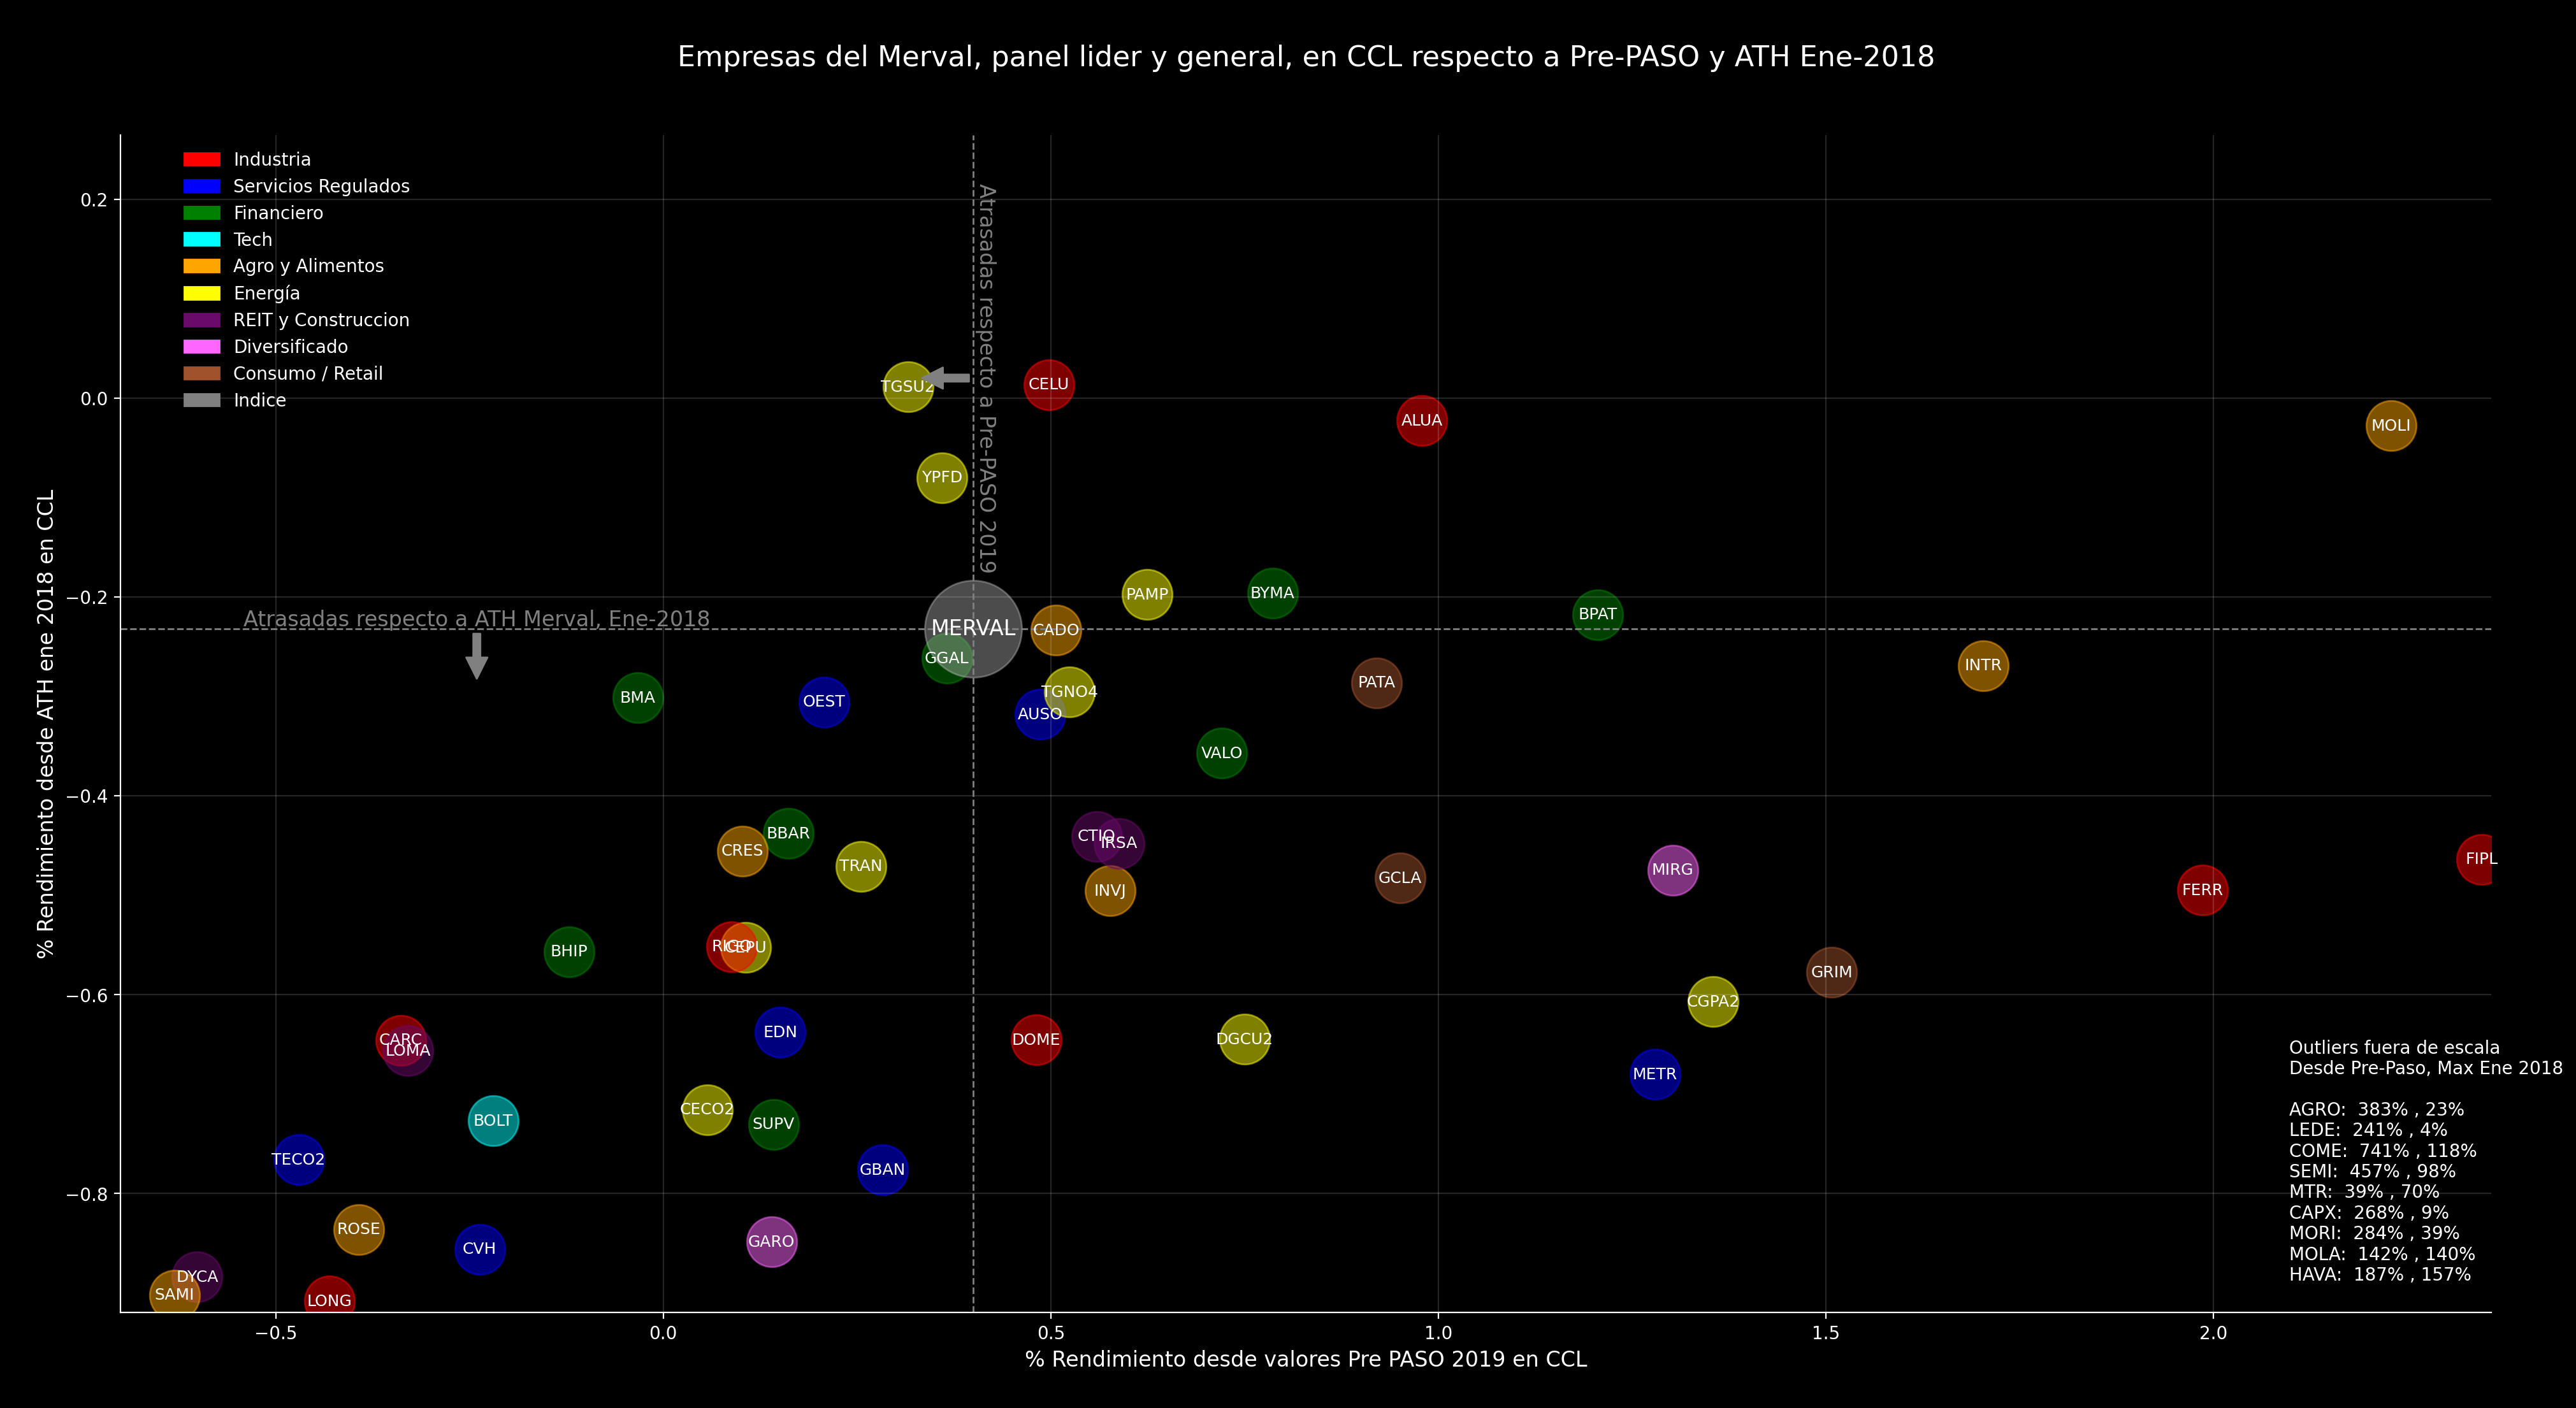

In [ ]:
plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(figsize=(24,12))
industry_color = {
    "Industria": "red",
    "Servicios Regulados": "blue",
    "Financiero": "green",
    "Tech": "cyan",
    "Agro y Alimentos": "orange",
    "Energía": "yellow",
    "REIT y Construccion": "#6A0A6A",
    "Diversificado": "#FF66FF",
    "Consumo / Retail": "sienna",
    "Indice": "gray"
}


outliers_X = from_paso.loc[from_paso > from_paso.quantile(0.9)].round(2).to_dict()
outliers_Y = from_ene_2018.loc[from_ene_2018 > from_ene_2018.quantile(0.9)].round(2).to_dict()
outliers = list(set(list(outliers_X.keys()) +  list(outliers_Y.keys())))
outliers_text = ''
for outlier in outliers:
  outliers_text += outlier.split('.')[0] +':  ' + str(int(round(from_paso.loc[outlier],2)*100)) +'% , ' + str(int(round(from_ene_2018.loc[outlier],2)*100)) + '%\n'


for x,y, label in zip(from_paso, from_ene_2018, from_paso.index):
    industry = sector_dictionary[label]
    color = industry_color[industry]
    if (label!="^MERV"):
        ax.annotate(label[:-3], xy=(x,y), ha='center', va='center', fontsize=9)
        ax.scatter(x,y, c=color, s=800, alpha=0.5)
    else:
        ax.annotate('MERVAL', xy=(x,y), ha='center', va='center', fontsize=12)
        ax.scatter(x,y, c='silver', s=3000, alpha=0.4)
        ax.axhline(y, ls='--', lw=1, color='gray')
        ax.axvline(x, ls='--', lw=1, color='gray')

        ax.annotate("Atrasadas respecto a ATH Merval, Ene-2018", xy=(from_paso.quantile(0.12), y-0.05), xytext=(from_paso.quantile(0.12), y + 0.02),
                    arrowprops=dict(facecolor='gray', edgecolor='gray', shrink= 0.0), ha='center', va='top', fontsize=12, color='gray')

        ax.annotate("Atrasadas respecto a Pre-PASO 2019", xy=(x-0.07, from_ene_2018.quantile(0.85)), xytext=(x+0.03, from_ene_2018.quantile(0.85)),
                    arrowprops=dict(facecolor='gray', edgecolor='gray', shrink=0.05), ha='right', va='center', fontsize=12, rotation=270, color='gray')


legend_patches = [Patch(color=color, label=industry) for industry, color in industry_color.items()]
ax.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(0.02, 1), ncols=1, frameon=False)

ax.set_xlabel('% Rendimiento desde valores Pre PASO 2019 en CCL\n', fontsize=12)
ax.set_ylabel('\n% Rendimiento desde ATH ene 2018 en CCL', fontsize=12)
ax.set_title(f"\nEmpresas del Merval, panel lider y general, en CCL respecto a Pre-PASO y ATH Ene-2018", y=1.05, fontsize=16)
ax.annotate('Outliers fuera de escala\nDesde Pre-Paso, Max Ene 2018\n\n'+outliers_text, xy=(from_paso.quantile(0.87), from_ene_2018.quantile(0.001)))
ax.set_xlim(-0.7, from_paso.quantile(0.9))
ax.set_ylim(-0.92, from_ene_2018.quantile(0.9))

ax.grid(alpha=0.15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [ ]:
data.iloc[-1]

,2024-09-10
Ticker,
AGRO.BA,0.507280
ALUA.BA,0.695179
AUSO.BA,2.398970
BBAR.BA,3.620556
BHIP.BA,0.344375
BMA.BA,6.188298
BOLT.BA,0.042032
BPAT.BA,1.969004
BYMA.BA,0.266418


In [ ]:
relative = (data.iloc[-1] / data).mean()
relative.sort_values()

,0
Ticker,
LONG.BA,0.601592
DYCA.BA,0.674344
SAMI.BA,0.828309
RIGO.BA,0.886853
TECO2.BA,1.053265
GARO.BA,1.059104
LOMA.BA,1.182040
ROSE.BA,1.190933
CVH.BA,1.221328
